In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


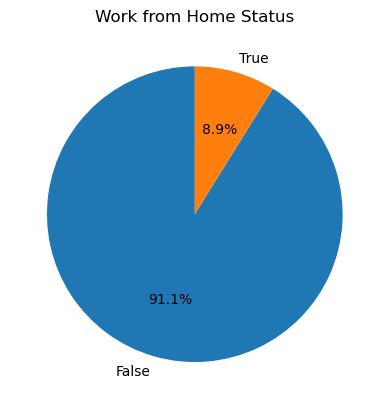

In [6]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

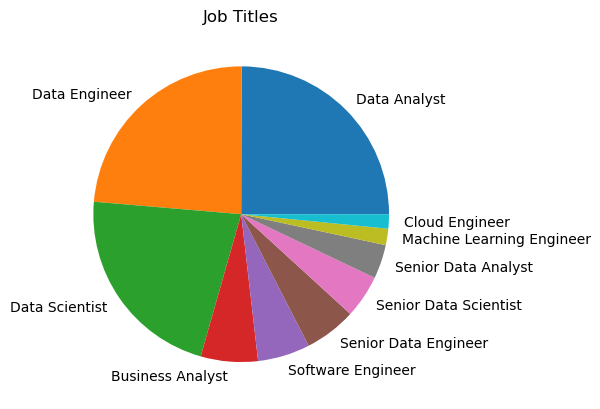

In [5]:
# Pode fazer tambem no caso de Job Titles, mas a pizza nao fica muito boa pois ha muitas opcoes
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

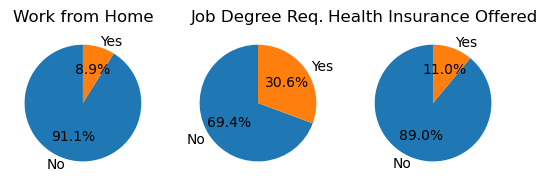

In [10]:
# Vamos fazer 3 graficos de pizza para serem apresentados simultaneamente
fig,ax = plt.subplots(1,3)           # 1 linha com 3 graficos

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered' 
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct ='%1.1f%%', labels=['No','Yes'])
    ax[i].set_title(title)

plt.show()